In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import bokeh.sampledata
from bokeh.io import vform
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.plotting import Figure, output_file, show
import pylab
import matplotlib.patches as mpatches

In [2]:
data='data for s1/2 to p3/2 transition 87 Rb'
#--------Physical constant
amu=1.661*10**-27;
mu_b=9.74*10**-24;
k_b=1.381*10**-23;
e=1.602*10**-19;
m_e=9.109*10**-31;
mu_0=4*3.14*10**-7;
epsilon_0=8.854*10**-12;
h_c=1.055*10**-34;
h=6.626*10**-34;
c=2.998*10**8;
#---------Constant for 87Rb
m_rb=87*amu;
decay=38.11*10**6;
lemda=780.032*10**-9;
life=26.24*10**-9;
i_sat=1.669;
v_recoil=(h_c*2*3.14)/(lemda*m_rb);
a_max=v_recoil*decay/2;
#--------User defined Constant
f_goodness=.6;
_v_oven=275
f=0.6

In [3]:
#All functions

In [4]:
delta=np.arange(-80,80)
def goodness(s):
    f=s/(1+s+(2*delta*10**6/decay)**2)
    return np.array(f)

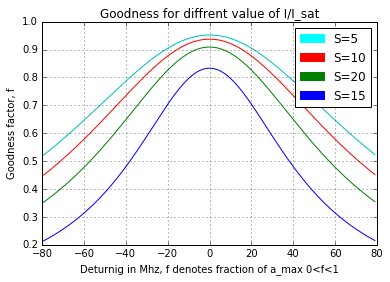

In [5]:
def plotfun(ax, x,s):
    return ax.plot(x,goodness(s))
fig, ax = plt.subplots(1,1)
l1 = plotfun(ax, delta,5)
l2 = plotfun(ax, delta,10)
l3 = plotfun(ax, delta,15)
l4 = plotfun(ax, delta,20)
plt.title("Goodness for diffrent value of I/I_sat")
plt.xlabel("Deturnig in Mhz, f denotes fraction of a_max 0<f<1")
plt.ylabel("Goodness factor, f")
red_patch = mpatches.Patch(color='red', label='S=10')
blue_patch = mpatches.Patch(color='blue', label='S=15')
green_patch = mpatches.Patch(color='green', label='S=20')
cyan_patch = mpatches.Patch(color='cyan', label='S=5')
plt.legend(handles=[cyan_patch, red_patch,green_patch,blue_patch],loc=1)
plt.grid()
plt.show()

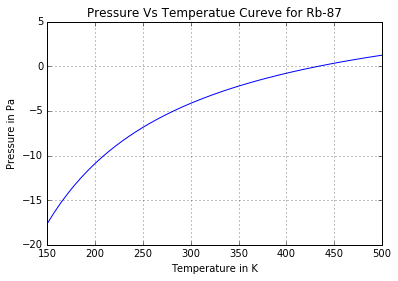

In [6]:
T=np.linspace(150,500)
P=[9.318-4040/Ts for Ts in T]
np.array(P)
plt.plot(T, np.array(P))
plt.grid()
plt.xlabel("Temperature in K")
plt.ylabel("Pressure in Pa")
plt.title("Pressure Vs Temperatue Cureve for Rb-87")
plt.show()

In [7]:
def slowerlength(a_max, eta, v0, vf = 0):
    """
    Total length of Zeeman slower to slow atoms from a given initial
    velocity to a final one.

    a_max: constans decelartion
    eta: goodness factor (within [0, 1])
    v0: maximum capture velcoity
    vf: final velocity (optional, defaults to 0)
    """
    return (v0*v0 - vf*vf) / (2 * np.abs(a_max) * eta)

In [8]:
#Code for Slower length:
sl=slowerlength(a_max,f,_v_oven,0)
print "The slower length calculated is",sl

The slower length calculated is 0.562683771496


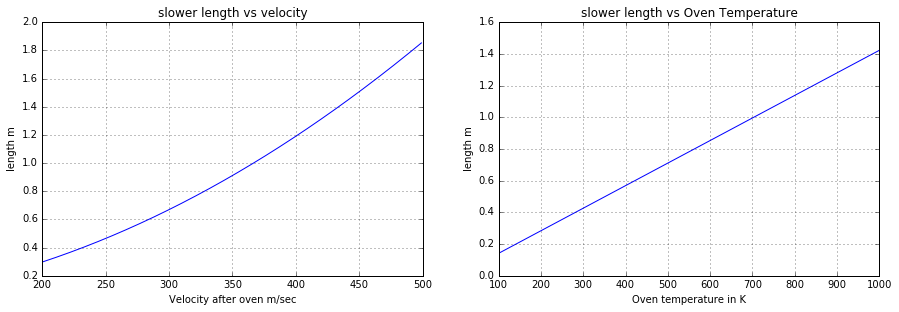

In [9]:
# Code for velcity only
v=[]
for x in range(200,500):
    v.append(slowerlength(a_max,0.6,x))
    
#Code for velocity from Oven Temperature
T=np.linspace(100,1000)
v_th=np.sqrt(2*k_b*T/m_rb)
s_len_temp=[]
for x in v_th:
    s_len_temp.append(slowerlength(a_max,0.6,x))
    
#Code for SubPlots    
plt.figure(figsize=(15,10))
#SubPlot 1
plt.subplot(2, 2, 1)    
plt.plot(range(200, 500), v)
plt.grid()
plt.title("slower length vs velocity")
plt.ylabel("length m")
plt.xlabel("Velocity after oven m/sec")
#SubPlot2
plt.subplot(2, 2, 2)
plt.plot(T, s_len_temp) 
plt.title("slower length vs Oven Temperature")
plt.ylabel("length m")
plt.xlabel("Oven temperature in K")
#Show SubPlot
plt.grid()
plt.show()

In [10]:
v_th=np.sqrt(2*k_b*300/m_rb)
print "Velocity corrosponding to 300 K",v_th

Velocity corrosponding to 300 K 239.457267269


In [11]:
k = 2*np.pi/(780*10**-9)
print "2*pi/lembda = ",k
#### Dimensioned
mU = 1.667e-27 # Mass: Atomic Mass Unit
h = 6.626e-34
hbar = h / 2 / np.pi
# uprimehbar = 1.399e10 * 2 * np.pi
bohrmag = 9.27400915e-24
uprimehbar = bohrmag/hbar

2*pi/lembda =  8055365.77844


In [12]:
#fg(0,.55,.001,50,.017)

In [13]:
def vfunction(sl, v_init,f):
    """
    Function for calculating velocity inside slower
    sl = slower length
    f = Goodness Factor
    v_init = initial velocity from oven
    """
    zs = np.linspace(0, sl,1000)
    vs=[]
    for zv in zs:
        #if zv<0:
        #    vs.append(0)
        #else: 
            
        if (((v_init**2 -2*a_max*f*zv) > 0)):
            vs.append(np.sqrt(v_init**2 -2*a_max*f*zv))
        else:
            vs.append(0)
    return np.array(vs)  

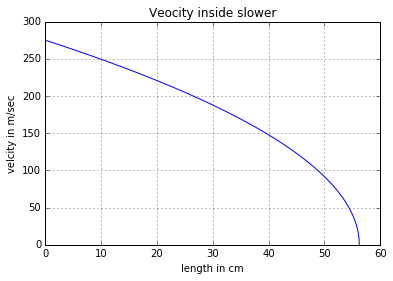

In [14]:
plt.plot(np.linspace(0,sl,1000)*100,vfunction(sl,_v_oven,f))
plt.title("Veocity inside slower")
plt.xlabel("length in cm")
plt.ylabel("velcity in m/sec")
plt.grid()
plt.show()

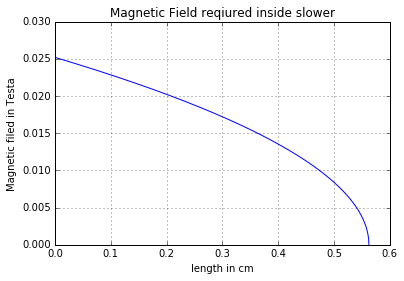

In [15]:
plt.plot(np.linspace(0,sl,1000),(k/uprimehbar)*vfunction(sl,_v_oven,f))
plt.title("Magnetic Field reqiured inside slower")
plt.xlabel("length in cm")
plt.ylabel("Magnetic filed in Testa")
plt.grid()
plt.show()

In [16]:
class c1:
    """ Rubidium-87 atom parameters """
    def __init__(self):
        #self.d = .0023048 
        #self.i = 10 best,max 16
        self.d = 0.0025881
        self.i= 8.5
        self.resistance=.9989/304.8

class c2:
    """ Rubidium-87 atom parameters """
    def __init__(self):
        self.d = .0016277 
        #self.i = 5 ,max 8
        self.i = 5.5

class c3:
    """ Rubidium-87 atom parameters """
    def __init__(self):
        self.d = .0010237 
        #self.i = 2 ,max 3
        self.i = 1.5
        self.resistance= 6.3851/304.8

c1=c1()
c2=c2()
c3=c3()

In [17]:
"""
The radius of Zeeman Slower i defined here (in cms)
"""
rad=.02

In [18]:
class Coil(object):
    def __init__(self,x1,x2,wire,polarity,d):
        self.x1 = x1
        self.x2 = x2
        self.d = wire.d
        self.i = wire.i*polarity
        self.r=rad+d
        self.resistance=wire.resistance
        
    def fg(self):
        """
        Some times also called fg or feild_gen
        x1 = initial Position
        x2 = final Position
        d = diameter of coil
        i = current
        r=radius from center
        """

        L=self.x2-self.x1
        N=L/self.d
        cnst=mu_0*N*self.i*.5/L
        x=np.linspace(-0.05,sl+.05,1000)
        i_1=(x-self.x1)/np.sqrt((x-self.x1)**2+self.r**2)
        i_2=(x-self.x2)/np.sqrt((x-self.x2)**2+self.r**2)
        B=cnst*(i_1-i_2)*10**4
        #changes for plot or NOT
        #plt.plot(x,np.array(B))
        #plt.grid()
        return np.array(B)
        #return    
        
    def len_wire(self):
        return 2*3.14*(self.x2-self.x1)*self.r/self.d
    def wh(self):
        return self.resistance*self.len_wire()*self.i**2
        
        
    

In [19]:
# adding array of array, returns void
def b_pos(*coils):
    coils = list(coils)
    b_mag = np.array(np.array([rad.fg() for rad in coils]))
    return sum(b_mag)

In [20]:
# Urgent Slowe Length check ()
sl

0.56268377149596693

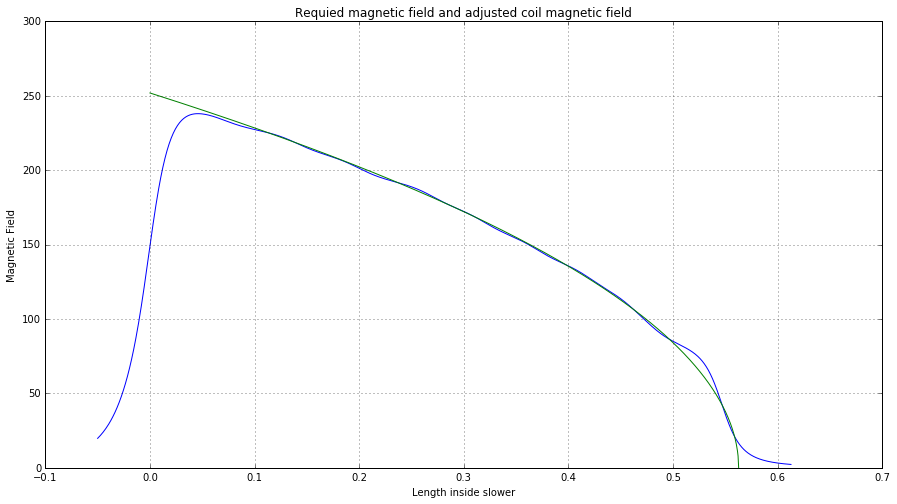

In [21]:
#Code to calculate required magnetic feild
vees = vfunction(sl,_v_oven, f)
bees = (k/uprimehbar)*vees
zs = np.linspace(0, sl,1000)
#---
sl_r=0.02
#x=np.linspace(0,sl,1000)
x=np.linspace(-0.05,sl+.05,1000)
#---
BaseCoil = Coil(0,sl-.016,c1,1,0)
Coil_1 = Coil(0.0,0.48,c3,1,2*c1.d)
Coil_2 = Coil(0.0,0.46,c3,1,2*c1.d+c3.d)
Coil_3 = Coil(0.0,0.42,c3,1,2*c1.d+c3.d*2)
Coil_4 = Coil(0.0,0.37,c3,1,2*c1.d+c3.d*3)
Coil_5 = Coil(0.0,0.32,c3,1,2*c1.d+c3.d*4)
Coil_6 = Coil(0.0,0.27,c3,1,2*c1.d+c3.d*5)
Coil_7 = Coil(0.0,0.2,c3,1,2*c1.d+c3.d*6)
Coil_8 = Coil(0.0,0.14,c3,1,2*c1.d+c3.d*7)
Coil_9 = Coil(0.0,0.07,c3,1,2*c1.d+c3.d*8)
Coil_10 = Coil(0.0,0.04,c3,1,2*c1.d+c3.d*9)
Coil_11 = Coil(0.0,0.02,c3,1,2*c1.d+c3.d*10)
Coil_12 = Coil(-0.02,0.00912,c1,1,2*c1.d+c3.d*11)
#----
b_pos=Coil_12.fg()+Coil_11.fg()+Coil_10.fg()+BaseCoil.fg()*2+Coil_1.fg()+Coil_2.fg()+Coil_3.fg()
b_pos=b_pos+Coil_4.fg()+Coil_5.fg()+Coil_6.fg()+Coil_7.fg()+Coil_8.fg()+Coil_9.fg()
#b_pos(BaseCoil,BaseCoil,Coil_1,Coil_2,Coil_3,Coil_4,
#Coil_5,Coil_6,Coil_7,Coil_8,Coil_9,Coil_10,Coil_11,Coil_12)
b_total=b_pos
plt.figure(figsize=(15,8))
plt.plot(x,b_total)
plt.plot(zs, bees*10**4)
plt.title("Requied magnetic field and adjusted coil magnetic field")
plt.xlabel("Length inside slower")
plt.ylabel("Magnetic Field")
plt.grid()
plt.show()

In [22]:
from scipy.interpolate import interp1d
def plot_coils(*coils):
    coils = list(coils)
    z = coils[0].x1
    Radii = np.array([rad.r for rad in coils])
    Thickness = [t.d for t in coils]
    Length = [c.x2-c.x1 for c in coils]
    start = [s.x1 for s in coils]
    ends = [s.x2 for s in coils]
    m = interp1d([min(Thickness), max(Thickness)], [5, 22])
    linewidths = m(Thickness)
    #labels = ['Coils {}'.format(x) for x in range(len(linewidths))]
    plt.figure(figsize=(16,7))
    plt.hlines(Radii, start, ends, lw=linewidths,color = ['r','g','b','y','m'], alpha=0.5)
    plt.hlines(-Radii, start, ends, lw=linewidths,color = ['r','g','b','y', 'm'], alpha=0.5)
    #plt.ylim(-6,6)
    
    #plt.xlim(z[0], z[-1])
    plt.grid()
    plt.title("Arrangement of coils")
    plt.xlabel("Length in cm")
    plt.ylabel("Tranversal Axis")
    #plt.legend()
    plt.show()

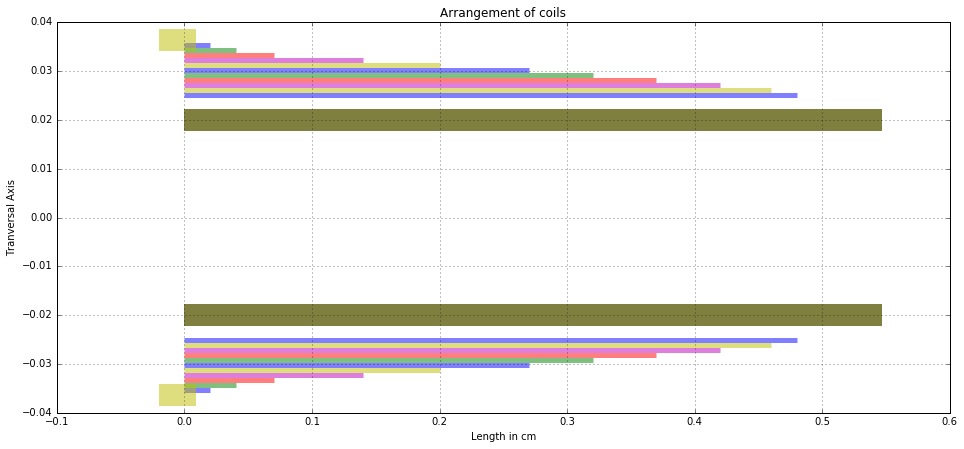

In [23]:
plot_coils(BaseCoil,BaseCoil,Coil_1,Coil_2,Coil_3,Coil_4,Coil_5,Coil_6,
           Coil_7,Coil_8,Coil_9,Coil_10,Coil_11,Coil_12)

In [24]:
def Lenghth_calculator(*coils):
    coils = list(coils)
    length = np.array([rad.len_wire() for rad in coils])
    return sum(length)

def Heat_calculator(*coils):
    coils = list(coils)
    heating = np.array([rad.wh() for rad in coils])
    return sum(heating)
    

In [25]:
Lenghth_calculator(Coil_1,Coil_2,Coil_3,Coil_4,Coil_5,Coil_6,
                   Coil_7,Coil_8,Coil_9,Coil_10,Coil_11,Coil_12) #13 gauge

485.85460146105834

In [26]:
Lenghth_calculator(BaseCoil,BaseCoil) #11 gauge

53.060918588843904

In [27]:
Heat_calculator(BaseCoil,BaseCoil,Coil_1,Coil_2,Coil_3,Coil_4,Coil_5,Coil_6,
                Coil_7,Coil_8,Coil_9,Coil_10,Coil_11,Coil_12)

35.952346451591247

In [28]:
"""
Real coil data: Confidential

#Code to calculate required magnetic feild
vees = vfunction(sl,275, 0.6)
bees = (k/uprimehbar)*vees
zs = np.linspace(-.05, 1,1000)
#---
sl_r=0.02
x=np.linspace(-.05,1,1000)
#----
BaseCoil = Coil(0.0,0.5,c1,1)
#sl_r=sl_r+c1.d/2
#-----
Coil_1 = Coil(0.0,0.4,c2,1)
#sl_r=sl_r+c1.d/2
#----
Coil_2 = Coil(0.0,0.3,c2,1)

Coil_3=Coil(0,0.18,c2,1)

Coil_4=Coil(0.0,.0591,c2,1)
Coil_5=Coil(0,.035,c3,-1)
#----

Coil_6=Coil(sl,sl+0.1,c3,-1)

Coil_7=Coil(sl-.002,sl+.01,c1,1)
#sl_r=sl_r+c1.d/2
#----
#Coil_3 = Coil(0.0,0.5,c4)
#sl_r=sl_r+c1.d/2
#----

#----
b_pos=BaseCoil.fg()*2+Coil_1.fg()+Coil_2.fg()+Coil_3.fg()+Coil_4.fg()+Coil_7.fg()
b_neg=0+Coil_6.fg()
b_total=b_pos+b_neg
plt.figure(figsize=(15,5))
plt.plot(x,b_total)
plt.plot(zs, bees*10**4)
plt.grid()
plt.show()
"""

'\nReal coil data: Confidential\n\n#Code to calculate required magnetic feild\nvees = vfunction(sl,275, 0.6)\nbees = (k/uprimehbar)*vees\nzs = np.linspace(-.05, 1,1000)\n#---\nsl_r=0.02\nx=np.linspace(-.05,1,1000)\n#----\nBaseCoil = Coil(0.0,0.5,c1,1)\n#sl_r=sl_r+c1.d/2\n#-----\nCoil_1 = Coil(0.0,0.4,c2,1)\n#sl_r=sl_r+c1.d/2\n#----\nCoil_2 = Coil(0.0,0.3,c2,1)\n\nCoil_3=Coil(0,0.18,c2,1)\n\nCoil_4=Coil(0.0,.0591,c2,1)\nCoil_5=Coil(0,.035,c3,-1)\n#----\n\nCoil_6=Coil(sl,sl+0.1,c3,-1)\n\nCoil_7=Coil(sl-.002,sl+.01,c1,1)\n#sl_r=sl_r+c1.d/2\n#----\n#Coil_3 = Coil(0.0,0.5,c4)\n#sl_r=sl_r+c1.d/2\n#----\n\n#----\nb_pos=BaseCoil.fg()*2+Coil_1.fg()+Coil_2.fg()+Coil_3.fg()+Coil_4.fg()+Coil_7.fg()\nb_neg=0+Coil_6.fg()\nb_total=b_pos+b_neg\nplt.figure(figsize=(15,5))\nplt.plot(x,b_total)\nplt.plot(zs, bees*10**4)\nplt.grid()\nplt.show()\n'

In [29]:
AWG       Dia-mils  TPI       Dia-mm    Circ-mils Ohms/Kft  Ft/Ohm    Ft/Lb     Ohms/Lb   Lb/Kft    *Amps     MaxAmps

10         101.90    9.8140    2.5881     10383    0.9989    1001.1    31.819    0.0318    31.428    13.844    20.765
11         90.741    11.020    2.3048    8233.9    1.2596    793.93    40.122    0.0505    24.924    10.978    16.468
12         80.807    12.375    2.0525    6529.8    1.5883    629.61    50.593    0.0804    19.765    8.7064    13.060
13         71.961    13.896    1.8278    5178.3    2.0028    499.31    63.797    0.1278    15.675    6.9045    10.357
14         64.083    15.605    1.6277    4106.6    2.5255    395.97    80.447    0.2031    12.431    5.4755    8.2132
15         57.067    17.523    1.4495    3256.7    3.1845    314.02    101.44    0.3230    9.8579    4.3423    6.5134
16         50.820    19.677    1.2908    2582.7    4.0156    249.03    127.91    0.5136    7.8177    3.4436    5.1654
17         45.257    22.096    1.1495    2048.2    5.0636    197.49    161.30    0.8167    6.1997    2.7309    4.0963
18         40.302    24.813    1.0237    1624.3    6.3851    156.62    203.39    1.2986    4.9166    2.1657    3.2485
19         35.890    27.863    0.9116    1288.1    8.0514    124.20    256.47    2.0648    3.8991    1.7175    2.5762

SyntaxError: invalid syntax (<ipython-input-29-53e9b1f1a2f6>, line 1)

In [30]:
class c1:
    """ Rubidium-87 atom parameters """
    def __init__(self):
        self.d = .00025 
        self.i = 10
c1=c1()

class c1:
    """ Rubidium-87 atom parameters """
    def __init__(self):
        self.d = .00025 
        self.i = 10
c1=c1()

class c1:
    """ Rubidium-87 atom parameters """
    def __init__(self):
        self.d = .00025 
        self.i = 10
c1=c1()



In [ ]:
def fg(x1,x2,c1,r):
    """
    Some times also called fg or feild_gen
    x1 = initial Position
    x2 = final Position
    d = diameter of coil
    i = current
    r=radius from center
    """
    L=x2-x1
    N=L/c1.d
    cnst=mu_0*N*c1.i*.5/L
    x=np.linspace(-.05,1,1000)
    i_1=(x-x1)/np.sqrt((x-x1)**2+r**2)
    i_2=(x-x2)/np.sqrt((x-x2)**2+r**2)
    B=cnst*(i_1-i_2)*10**4
    #changes for plot or NOT
    #plt.plot(x,np.array(B))
    #plt.grid()
    return np.array(B)
    #return    
    


In [ ]:
#Code to calculate required magnetic feild
vees = vfunction(sl,275, 0.6)
bees = (k/uprimehbar)*vees
zs = np.linspace(-.5, 1, 1000)
#---
x=np.linspace(-.05,.6,1000)

b_p=fg(0,sl,c1,.017)+fg(0,sl,c1,.017)+fg(0,sl,c1,.017)
b_n=fg(.4,.55,c1,.017)
b_total=b_p+b_n
plt.figure(figsize=(15,5))
#plt.plot(x,b_p)
#plt.plot(x,b_n)
plt.plot(x,b_total)
plt.plot(zs, bees*10**4)
plt.grid()
#---
#plt.plot(x,b_n)
plt.plot(zs, bees*10**4)
plt.show()

In [ ]:
a=[1,2,4]
sum(a)